In [1]:
import pandas as pd
import numpy as np

from google.colab import files
myfile = files.upload() #데이터셋 업로드

Saving vgames2.csv to vgames2 (1).csv


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')  ##한글 깨짐 현상 해결

df = pd.read_csv('vgames2.csv')
df

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.info()  ## 데이터 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [4]:
df = df.dropna() #결측치를 제거
df.info()
import pandas as pd

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [5]:
def kvalue(string):     #수치의 K와 M을 숫자로 변환
  if 'K' in string:
     string1 = ''.join(string.split('K'))
     return float(string1)
  elif 'M' in string:
     string2 = ''.join(string.split('M'))
     return float(string2)*1000
  else:
     return float(string)

df['NA_Sales'] = df['NA_Sales'].apply(kvalue)
df['NA_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0        0.04
1        0.17
2        0.00
3        0.04
4        0.12
         ... 
16593    0.15
16594    0.01
16595    0.44
16596    0.05
16597    0.00
Name: NA_Sales, Length: 16241, dtype: float64

In [6]:
df['EU_Sales'] = df['EU_Sales'].apply(kvalue)
df['JP_Sales'] = df['JP_Sales'].apply(kvalue)
df['Other_Sales'] = df['Other_Sales'].apply(kvalue)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
print(df['NA_Sales'].sum()) #북미 시장규모
print(df['EU_Sales'].sum()) #유럽 시장규모
print(df['JP_Sales'].sum()) #일본 시장규모
print(df['Other_Sales'].sum()) #그 외 시장규모

78822.45000000001
36689.240000000005
21211.43
8205.939999999999


In [8]:
df.describe() #통계치 확인

,Unnamed: 0,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,8291.719845,1994.178437,4.853300,2.259051,1.306042,0.505261
std,4792.062774,155.484265,122.722963,53.028899,45.146939,10.246272
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4143.000000,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,8284.000000,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,12441.000000,2010.000000,0.240000,0.120000,0.040000,0.040000
max,16598.000000,2020.000000,9630.000000,2930.000000,3150.000000,590.000000


In [9]:
# 지역에 따라서 선호하는 장르가 다를까?
# 판매량이 선호도에 비례한다고 가정하여

C_genre = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
C_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


In [10]:
C_genre_NA = df[['Genre','NA_Sales']]
C_genre_NA['rank'] = C_genre_NA['NA_Sales'].rank(ascending=False)
C_genre_NA['rank'] = C_genre_NA['rank'].astype(int)
C_genre_NAR = (C_genre_NA['rank'] < 101) ## TOP 100위 안에 장르를 확인해보자
C_genre_NA[C_genre_NAR]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Genre,NA_Sales,rank
10,Racing,480.0,33
447,Action,580.0,27
458,Racing,250.0,58
577,Racing,5550.0,3
625,Platform,140.0,70
...,...,...,...
16194,Racing,120.0,80
16330,Misc,720.0,23
16408,Racing,530.0,31
16492,Fighting,470.0,34


Sports          22
Action          19
Racing          12
Shooter          9
Misc             9
Simulation       7
Platform         6
Role-Playing     5
Adventure        4
Strategy         3
Fighting         3
Name: Genre, dtype: int64


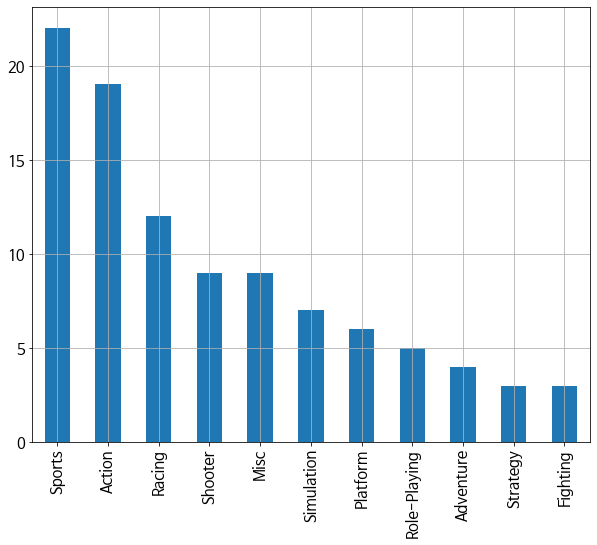

In [11]:
print(C_genre_NA[C_genre_NAR]['Genre'].value_counts())
CountStatus = pd.value_counts(C_genre_NA[C_genre_NAR]['Genre'].values, sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정

북미의 경우 
1위 Sport(23),
2위 Action(20),
3위 Racing(11),
4위 Shooter(9), 
5위 Mics(8)

Action          22
Platform        16
Racing          11
Misc            11
Shooter         11
Sports          10
Role-Playing     6
Simulation       4
Adventure        3
Puzzle           3
Fighting         3
Strategy         2
Name: Genre, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


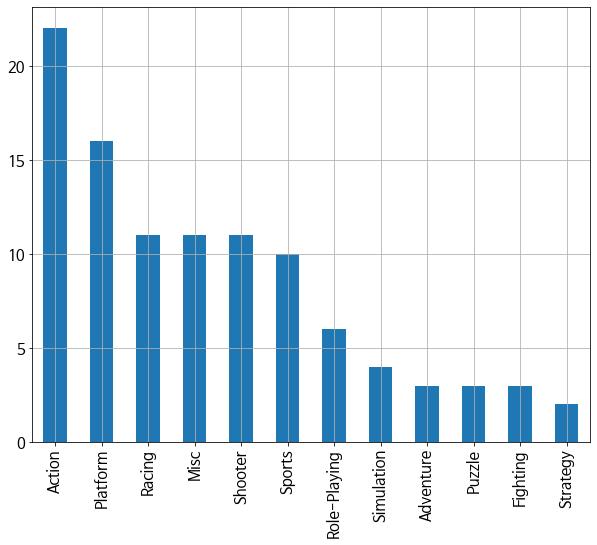

In [12]:
# 코드 복붙하여 다른 지역도 확인 (유럽)
C_genre_EU = df[['Genre','EU_Sales']]
C_genre_EU['rank'] = C_genre_EU['EU_Sales'].rank(ascending=False)
C_genre_EU['rank'] = C_genre_EU['rank'].astype(int)
C_genre_EUR = (C_genre_EU['rank'] < 101)
C_genre_EU[C_genre_EUR]
print(C_genre_EU[C_genre_EUR]['Genre'].value_counts())
CountStatus1 = pd.value_counts(C_genre_EU[C_genre_EUR]['Genre'].values, sort=True)
CountStatus1.plot.bar()
CountStatus1.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정

유럽 
1위 Action          23,
2위 Platform        16,
3위 Misc            11,
4위 Shooter         11,
5위 Racing          10,

Role-Playing    25
Action          18
Misc            10
Platform         9
Fighting         9
Simulation       7
Sports           6
Racing           5
Adventure        4
Strategy         3
Puzzle           2
Shooter          2
Name: Genre, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


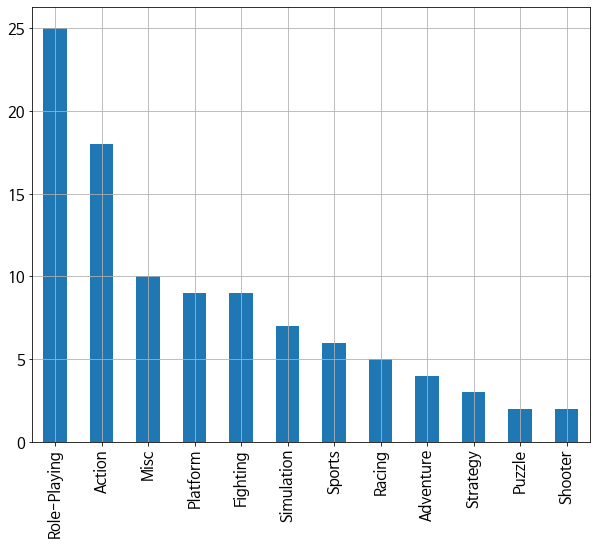

In [13]:
# 코드 복붙하여 다른 지역도 확인 (일본)
C_genre_JP = df[['Genre','JP_Sales']]
C_genre_JP['rank'] = C_genre_JP['JP_Sales'].rank(ascending=False)
C_genre_JP['rank'] = C_genre_JP['rank'].astype(int)
C_genre_JPR = (C_genre_JP['rank'] < 101)
C_genre_JP[C_genre_JPR]
print(C_genre_JP[C_genre_JPR]['Genre'].value_counts())
CountStatus2 = pd.value_counts(C_genre_JP[C_genre_JPR]['Genre'].values, sort=True)
CountStatus2.plot.bar()
CountStatus2.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정

일본
1위 Role-Playing    25,
2위 Action          18,
3위 Misc            10,
4위 Platform         9,
5위 Fighting         9,

Action          21
Sports          15
Role-Playing    14
Misc            10
Shooter          9
Platform         8
Racing           7
Fighting         7
Adventure        5
Puzzle           5
Strategy         4
Simulation       3
Name: Genre, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


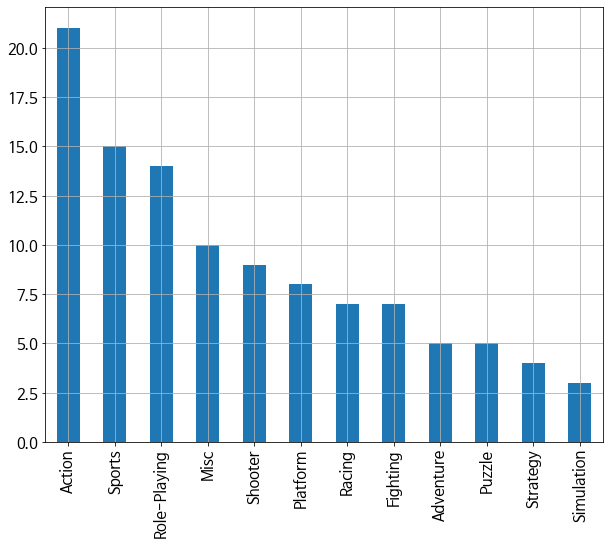

In [14]:
# 코드 복붙하여 다른 지역도 확인 (그 외)
C_genre_OS = df[['Genre','Other_Sales']]
C_genre_OS['rank'] = C_genre_OS['Other_Sales'].rank(ascending=False)
C_genre_OS['rank'] = C_genre_OS['rank'].astype(int)
C_genre_OSR = (C_genre_OS['rank'] < 101)
C_genre_OS[C_genre_OSR]
print(C_genre_OS[C_genre_OSR]['Genre'].value_counts())
CountStatus3 = pd.value_counts(C_genre_OS[C_genre_OSR]['Genre'].values, sort=True)
CountStatus3.plot.bar()
CountStatus3.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정

그 외 지역
1위 Action          21,
2위 Sports          16,
3위 Role-Playing    14,
4위 Misc            10,
5위 Platform         9,

In [15]:
C_rank = pd.DataFrame({'북미':['Sport','Action','Racing','Shooter','Mics'],'북미count':[23,20,11,9,8],
                       '유럽':['Action','Platform','Mics','Shooter','Racing'],'유럽count':[23,16,11,11,10],
                       '일본':['Role-playing','Action','Mics','Platform','Fighting'],'일본count':[25,18,10,9,9],
                       '그외':['Action','Sport','Role-playing','Mics','Platform'],'그외count':[21,16,14,10,9]}, index = ['1위','2위','3위','4위','5위'])
C_rank

,북미,북미count,유럽,유럽count,일본,일본count,그외,그외count
1위,Sport,23,Action,23,Role-playing,25,Action,21
2위,Action,20,Platform,16,Action,18,Sport,16
3위,Racing,11,Mics,11,Mics,10,Role-playing,14
4위,Shooter,9,Shooter,11,Platform,9,Mics,10
5위,Mics,8,Racing,10,Fighting,9,Platform,9


'Action', 'Mics' 장르를 제외하고는 지역별로 선호하는 장르는 상이하다고 볼 수 있음

In [16]:
# 연도별 트렌드를 알아보자

trend_df = df[['Name','Year','Genre']]
tidy1 = trend_df.melt(id_vars = 'Year', value_vars = ['Genre']) #melt
tidy1
trend_dfa = tidy1.value_counts() # 년도별로 장르 숫자 파악
trend_dfa = pd.DataFrame([trend_dfa])
trend_dfa = trend_dfa.T
trend_dfa


0
Year   variable value          
2009.0 Genre    Action      270
2012.0 Genre    Action      263
2015.0 Genre    Action      250
2011.0 Genre    Action      238
2010.0 Genre    Action      226
...                         ...
1982.0 Genre    Misc          1
1983.0 Genre    Adventure     1
                Misc          1
                Puzzle        1
2020.0 Genre    Simulation    1

[467 rows x 1 columns]

연도별 장르의 수 

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

trend_dfaa = trend_dfa.reset_index(level=['Year', 'variable','value'])
trend_dfaa['Year'] = trend_dfaa['Year'].astype(int)
trend_dfaa = trend_dfaa.sort_values(['value','Year'])
trend_dfaa

,Year,variable,value,0
405,4,Genre,Action,1
406,5,Genre,Action,1
338,6,Genre,Action,2
415,8,Genre,Action,1
372,9,Genre,Action,1
...,...,...,...,...
230,2012,Genre,Strategy,15
209,2013,Genre,Strategy,19
269,2014,Genre,Strategy,8
225,2015,Genre,Strategy,17


<Figure size 1440x720 with 0 Axes>

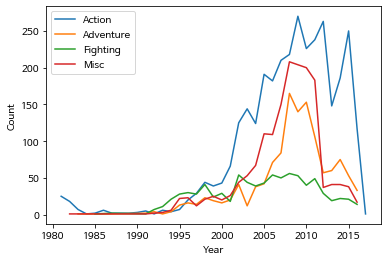

<Figure size 1440x720 with 0 Axes>

In [18]:
# 이것을 그래프로 나타내보자 

df_action = trend_dfaa[trend_dfaa['value'].isin(['Action'])]
df_action.columns = ['Year','variable','value','count']
aa = df_action[(df_action['Year'] >1980)]
plt.plot(aa['Year'], aa['count'],label="Action")

df_Adventure = trend_dfaa[trend_dfaa['value'].isin(['Adventure'])]
df_Adventure.columns = ['Year','variable','value','count']
aa1 = df_Adventure[(df_Adventure['Year'] >1980)]
plt.plot(aa1['Year'], aa1['count'],label="Adventure")

df_Fighting = trend_dfaa[trend_dfaa['value'].isin(['Fighting'])]
df_Fighting.columns = ['Year','variable','value','count']
aa2 = df_Fighting[(df_Fighting['Year'] >1980)]
plt.plot(aa2['Year'], aa2['count'],label="Fighting")

df_Misc = trend_dfaa[trend_dfaa['value'].isin(['Misc'])]
df_Misc.columns = ['Year','variable','value','count']
aa4 = df_Misc[(df_Misc['Year'] >1980)]
plt.plot(aa4['Year'], aa4['count'],label="Misc")


plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.figure(figsize=(20,10))

2000년 이전에는 게임 생산량 자체가 적었다가 2003년을 기점으로 'action',  'mics', 'adventure' 게임이 늘어남

<Figure size 1440x720 with 0 Axes>

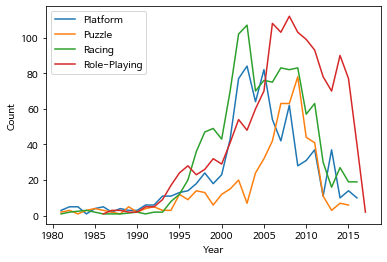

<Figure size 1440x720 with 0 Axes>

In [19]:
df_Platform = trend_dfaa[trend_dfaa['value'].isin(['Platform'])]
df_Platform.columns = ['Year','variable','value','count']
bb = df_Platform[(df_Platform['Year'] >1980)]
plt.plot(bb['Year'], bb['count'],label="Platform")

df_Puzzle = trend_dfaa[trend_dfaa['value'].isin(['Puzzle'])]
df_Puzzle.columns = ['Year','variable','value','count']
bb1 = df_Puzzle[(df_Puzzle['Year'] >1980)]
plt.plot(bb1['Year'], bb1['count'],label="Puzzle")

df_Racing = trend_dfaa[trend_dfaa['value'].isin(['Racing'])]
df_Racing.columns = ['Year','variable','value','count']
bb2 = df_Racing[(df_Racing['Year'] >1980)]
plt.plot(bb2['Year'], bb2['count'],label="Racing")

df_Role = trend_dfaa[trend_dfaa['value'].isin(['Role-Playing'])]
df_Role.columns = ['Year','variable','value','count']
bb3 = df_Role[(df_Role['Year'] >1980)]
plt.plot(bb3['Year'], bb3['count'],label="Role-Playing")

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.figure(figsize=(20,10))

Platform, Puzzle, Racing, Role-playing

<Figure size 1440x720 with 0 Axes>

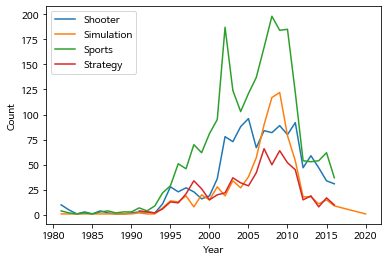

<Figure size 1440x720 with 0 Axes>

In [20]:
df_Shooter = trend_dfaa[trend_dfaa['value'].isin(['Shooter'])]
df_Shooter.columns = ['Year','variable','value','count']
cc = df_Shooter[(df_Shooter['Year'] >1980)]
plt.plot(cc['Year'], cc['count'],label="Shooter")

df_Simulation = trend_dfaa[trend_dfaa['value'].isin(['Simulation'])]
df_Simulation.columns = ['Year','variable','value','count']
cc1 = df_Simulation[(df_Simulation['Year'] >1980)]
plt.plot(cc1['Year'], cc1['count'],label="Simulation")

df_Sports = trend_dfaa[trend_dfaa['value'].isin(['Sports'])]
df_Sports.columns = ['Year','variable','value','count']
cc2 = df_Sports[(df_Sports['Year'] >1980)]
plt.plot(cc2['Year'], cc2['count'],label="Sports")

df_Strategy = trend_dfaa[trend_dfaa['value'].isin(['Strategy'])]
df_Strategy.columns = ['Year','variable','value','count']
cc3 = df_Strategy[(df_Strategy['Year'] >1980)]
plt.plot(cc3['Year'], cc3['count'],label="Strategy")

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.figure(figsize=(20,10))

Shooter, Simulation, Sports, Stragegy

<Figure size 2880x1440 with 0 Axes>

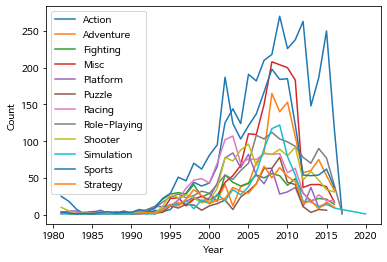

<Figure size 2880x1440 with 0 Axes>

In [21]:
df_action = trend_dfaa[trend_dfaa['value'].isin(['Action'])]
df_action.columns = ['Year','variable','value','count']
aa = df_action[(df_action['Year'] >1980)]
plt.plot(aa['Year'], aa['count'],label="Action")

df_Adventure = trend_dfaa[trend_dfaa['value'].isin(['Adventure'])]
df_Adventure.columns = ['Year','variable','value','count']
aa1 = df_Adventure[(df_Adventure['Year'] >1980)]
plt.plot(aa1['Year'], aa1['count'],label="Adventure")

df_Fighting = trend_dfaa[trend_dfaa['value'].isin(['Fighting'])]
df_Fighting.columns = ['Year','variable','value','count']
aa2 = df_Fighting[(df_Fighting['Year'] >1980)]
plt.plot(aa2['Year'], aa2['count'],label="Fighting")

df_Misc = trend_dfaa[trend_dfaa['value'].isin(['Misc'])]
df_Misc.columns = ['Year','variable','value','count']
aa4 = df_Misc[(df_Misc['Year'] >1980)]
plt.plot(aa4['Year'], aa4['count'],label="Misc")

df_Platform = trend_dfaa[trend_dfaa['value'].isin(['Platform'])]
df_Platform.columns = ['Year','variable','value','count']
bb = df_Platform[(df_Platform['Year'] >1980)]
plt.plot(bb['Year'], bb['count'],label="Platform")

df_Puzzle = trend_dfaa[trend_dfaa['value'].isin(['Puzzle'])]
df_Puzzle.columns = ['Year','variable','value','count']
bb1 = df_Puzzle[(df_Puzzle['Year'] >1980)]
plt.plot(bb1['Year'], bb1['count'],label="Puzzle")

df_Racing = trend_dfaa[trend_dfaa['value'].isin(['Racing'])]
df_Racing.columns = ['Year','variable','value','count']
bb2 = df_Racing[(df_Racing['Year'] >1980)]
plt.plot(bb2['Year'], bb2['count'],label="Racing")

df_Role = trend_dfaa[trend_dfaa['value'].isin(['Role-Playing'])]
df_Role.columns = ['Year','variable','value','count']
bb3 = df_Role[(df_Role['Year'] >1980)]
plt.plot(bb3['Year'], bb3['count'],label="Role-Playing")

df_Shooter = trend_dfaa[trend_dfaa['value'].isin(['Shooter'])]
df_Shooter.columns = ['Year','variable','value','count']
cc = df_Shooter[(df_Shooter['Year'] >1980)]
plt.plot(cc['Year'], cc['count'],label="Shooter")

df_Simulation = trend_dfaa[trend_dfaa['value'].isin(['Simulation'])]
df_Simulation.columns = ['Year','variable','value','count']
cc1 = df_Simulation[(df_Simulation['Year'] >1980)]
plt.plot(cc1['Year'], cc1['count'],label="Simulation")

df_Sports = trend_dfaa[trend_dfaa['value'].isin(['Sports'])]
df_Sports.columns = ['Year','variable','value','count']
cc2 = df_Sports[(df_Sports['Year'] >1980)]
plt.plot(cc2['Year'], cc2['count'],label="Sports")

df_Strategy = trend_dfaa[trend_dfaa['value'].isin(['Strategy'])]
df_Strategy.columns = ['Year','variable','value','count']
cc3 = df_Strategy[(df_Strategy['Year'] >1980)]
plt.plot(cc3['Year'], cc3['count'],label="Strategy")

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.figure(figsize=(40,20))

2000년 이전으로는 게임 종류와 상관없이 비슷하게 가다가

2000년 ~ 2005년 'Action', 'Sports', 'Racing', 'Platform', 'Shooter' 순으로 생산이 많이되고

2006년 ~ 2010년 'Action', 'Mics', 'Sports', 'Adventure', 'Simulation' 순으로 생산이 많이 되고

2011년 ~ 2018년 'Action', 'Role-Playing', 'Adventure', 'Sports', 'Shooter' 순으로 생산이 많이됨



In [22]:
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

df['Total_Value'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] # 출고량 구하기

T_game = df[['Name','Platform','Year','Genre','Total_Value']]
T_game['rank'] = T_game['Total_Value'].rank(ascending=False)
T_game['rank'] = T_game['rank'].astype(int)
T_gameR = (T_game['rank'] < 301) ## TOP 300위
TT = pd.DataFrame(T_game[T_gameR])
TT = TT.reset_index(drop=True)  ## TOP 300위 추출

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [23]:
TT
# 어떤 장르가 가장 많을까?
# 최근에는 어떤 장르가 많이 팔릴까?
# 어떤 플랫폼이 좋고, 플랫폼별 총 판매량 평균은 어떨까?
# 게임 이름에 많이 쓰이는 단어가 있을까?
# 게임 총 판매량의 분포가 어떠한가?

,Name,Platform,Year,Genre,Total_Value,rank
0,Ford Racing,PS,2001.0,Racing,810.06,38
1,Resident Evil: Revelations 2,PS3,2015.0,Action,60.27,234
2,Warriors Orochi 3,PS4,2014.0,Action,50.10,264
3,Medal of Honor: Warfighter,X360,2012.0,Action,580.58,56
4,F1 2010,PS3,2010.0,Racing,251.11,111
...,...,...,...,...,...,...
295,NASCAR 06: Total Team Control,PS2,2005.0,Racing,530.11,61
296,Mortal Kombat,PSV,2012.0,Fighting,470.30,64
297,Shin Chan: Las Nuevas Aventuras Para Wii!,Wii,2006.0,Action,70.00,224
298,Gex: Enter the Gecko,PS,1998.0,Platform,320.26,83


Action          63
Sports          48
Platform        31
Role-Playing    31
Misc            28
Racing          24
Shooter         24
Fighting        18
Simulation      14
Strategy         8
Adventure        8
Puzzle           3
dtype: int64

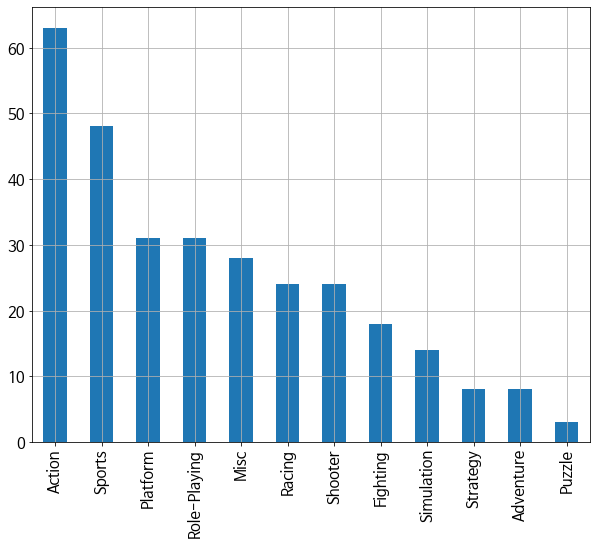

In [24]:
# 어떤 장르가 가장 많을까?
TT_G = pd.value_counts(TT['Genre'].values, sort=True)
TT_G.plot.bar()
TT_G.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정
TT_G

'Action',  'Sports',  'Role-Playing' 순으로 많다

Action          6
Shooter         4
Sports          3
Fighting        3
Role-Playing    2
Platform        2
Adventure       1
dtype: int64


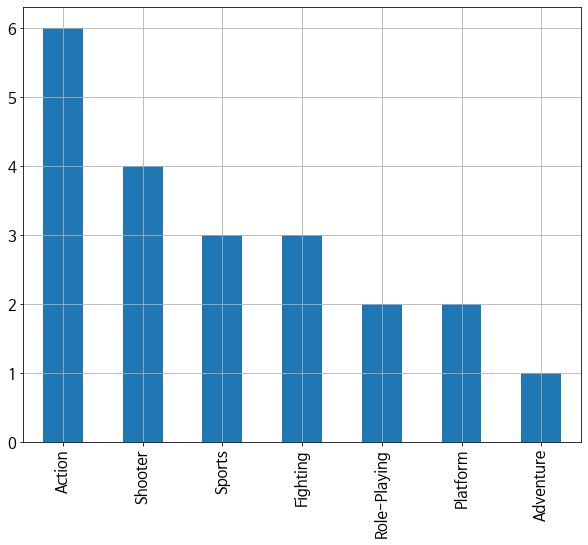

In [25]:
# 최근에는 어떤 장르가 많이 팔릴까? # 2014년도 이후 
condition = (TT['Year'] > 2013)
TTT = TT[condition]
TTT = pd.value_counts(TTT['Genre'].values, sort=True)
TTT.plot.bar()
TTT.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정
print(TTT) 

2014년도 이후 

Action          5

Shooter         4

Sports          3

Role-Playing    2


Fighting        2


Platform        1


Adventure       1


In [26]:
# 어떤 플랫폼이 좋고, 플랫폼별 총 판매량 평균은 어떨까?

TT.groupby('Platform').max()

,Name,Year,Genre,Total_Value,rank
Platform,,,,,
2600,E.T.: The Extra Terrestrial,1981.0,Action,111.86,170
3DS,Super Street Fighter IV: 3D Edition,2015.0,Sports,550.67,291
DS,Trace Memory,2012.0,Simulation,1611.99,282
GB,Pokémon Yellow: Special Pikachu Edition,2000.0,Role-Playing,3131.52,224
GBA,Tim Burton's The Nightmare Before Christmas: T...,2005.0,Role-Playing,3157.34,289
GC,Teenage Mutant Ninja Turtles 2: Battle Nexus,2006.0,Strategy,270.91,285
GEN,Virtua Racing,1994.0,Racing,260.00,110
N64,World Cup 98,2000.0,Sports,5554.32,287
NES,Super Mario Bros. 2,1989.0,Puzzle,461.04,284


어떤 플랫폼의 경우 어느 시점 이후로는 더이상 만들어지지 않음 (Ex. GB, GEN, XB 등)

최근까지 쓰이는 플랫폼을 본다면(최소 2014년 이후): 3DS, PC, PS3, PS4, WiiU, XOne 



In [27]:
TT.groupby('Platform').mean()

,Year,Total_Value,rank
Platform,,,
2600,1981.000000,111.860000,170.000000
3DS,2012.700000,141.393000,197.500000
DS,2008.250000,381.042000,123.050000
GB,1999.000000,1600.760000,115.000000
GBA,2003.000000,974.810000,107.555556
GC,2004.100000,99.186000,211.600000
GEN,1994.000000,260.000000,110.000000
N64,1998.454545,1318.183636,146.909091
NES,1986.750000,189.637500,179.250000


최근까지 쓰이는 플랫폼 중 게임들의 평균 수익을 보면

3DS : 655.30

PC : 340.24

PS3 : 327.15

PS4 : 469.66

WiiU : 617.89

XOne : 853.76

적어도 3순위 안에 드는 XOne, 3DS, WiiU 안에서 플랫폼을 선택하는게 합리적으로 보인다.

In [28]:
# 게임 이름에 많이 쓰이는 단어가 있을까?


array1 = TT['Name'].to_numpy()

wordList = array1
wordCount = {} 
for word in wordList:
    wordCount[word] = wordCount.get(word, 0) + 1 
    keys = sorted(wordCount.keys())
for word in keys:
    print(word + ':' + str(wordCount[word])) 



2002 FIFA World Cup:1
4 Elements:1
50 Cent: Blood on the Sand:1
7th Dragon 2020-II:1
Ace Combat X: Skies of Deception:1
Adventures of Lolo:1
Alien: Isolation:1
Animal Planet: Vet Life:1
Ar tonelico Qoga: Knell of Ar Ciel:1
Arcana Heart 3:1
Army Corps of Hell:1
Assassin's Creed III:1
Asura's Wrath:1
Barbie Explorer:1
Battalion Wars:1
Battleborn:1
Battlefield 3:1
BioShock Infinite:1
BlazBlue: Continuum Shift II:1
Blazing Souls: Accelate:1
Bogey: Dead 6:1
Bottom of the 9th:1
Bratz Ponyz:1
Bubsy 3D:1
Bulletstorm:1
Bully:1
Bushido Blade:1
Cabela's Outdoor Adventures (2006):1
Cabela's Trophy Bucks:1
Call of Duty: Advanced Warfare:1
Call of Duty: Ghosts:1
Call of Duty: Modern Warfare 2:1
Captain Tsubasa: Aratanaru Densetsu Joshou:1
Casper: Spirit Dimensions:1
Castlevania: Dawn of Sorrow:1
Castlevania: Symphony of the Night:1
Catwoman:1
Chibi Maruko-Chan: Harikiri 365-Nichi no Maki:1
Clock Tower 3:1
Club Penguin: Game Day!:1
Colony Wars:1
Conflict: Desert Storm II - Back to Bagdhad:1
Cooking M

Mario 9번

super 7번

Madden NFL 6번

Lego 5번

Lesident Evil 5번

크게 의미있는 단어들이라 보기 힘듬

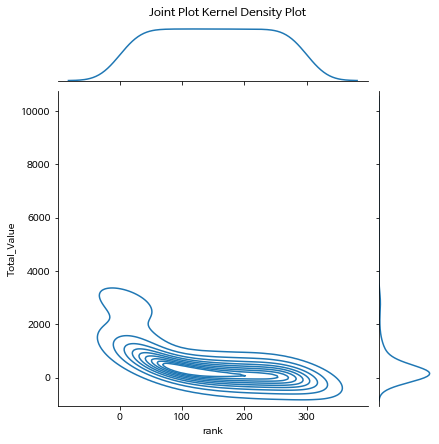

In [29]:
# 게임 총 판매량의 분포가 어떠한가?

import seaborn as sns

sns.jointplot(x="rank", y="Total_Value", data=TT, kind="kde")
plt.suptitle("Joint Plot Kernel Density Plot", y=1.02)
plt.show()

표본의 평균 : 446.42

신뢰도 95%의 구간 : 338.97 ~ 553.87

In [30]:
# 게임 총 판매량의 분포가 어떠한가?

from scipy import stats

def confidence_interval(data, confidence = 0.95):
  
  """
  주어진 데이터의 표본 **평균**에 대한 신뢰구간을 계산.
  기본 값으로 t-분포와 양방향 (two-tailed), 95%의 신뢰도를 사용합니다. 
  
  입력 값 : 
    data - 여러 개로 이루어진 (list 혹은 numpy 배열) 표본 관측치
    confidence - 신뢰구간을 위한 신뢰도 
  
  반환 되는 값:
    (평균, 하한, 상한구간)으로 이루어진 tuple
  """

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  
  # std / sqrt(n)
  stderr = stats.sem(data) 
  # s / sqrt(n)

  # length_of_one_interval
  interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1) # ppf : inverse of cdf
  return (mean, mean - interval, mean + interval)


confidence_interval(TT['Total_Value'], confidence = 0.95)

# 1 + 0.95 / 2 -> 0.975
# (1 - 0.95) / 2 -> 0.025



(446.42426666666665, 338.97492904103774, 553.8736042922956)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


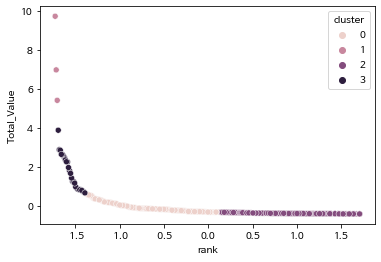

In [31]:
## 클러스터 
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

features = TT.loc[:, ['rank','Total_Value']]
label = TT['Genre']

##k-means clustering
features = StandardScaler().fit_transform(features) ## 정규화

model = KMeans(n_clusters = 4, random_state = 42) 
model.fit(features)
features = pd.DataFrame(features, columns =['rank','Total_Value'])


cluster = model.labels_ 
np.unique(cluster, return_counts = True) #0,1 개수  = 134, 66

features['cluster'] = cluster

import seaborn as sns

sns.scatterplot(data = features, x = 'rank', y = 'Total_Value', hue = 'cluster')

In [32]:
## 북미에서 많이 팔리는 게임이 유럽에서도 많이 팔릴까?
## 귀무가설 : 북미와 유럽이 연관이 없다
## 대립가설 : 북미와 유럽이 연관이 있다.
NA_EU = df[['NA_Sales','EU_Sales','Total_Value']]
NA_EU['rank'] = NA_EU['Total_Value'].rank(ascending=False)
NA_EU['rank'] = NA_EU['rank'].astype(int)
NA_EUR = (NA_EU['rank'] < 301) ## TOP 300위
NE = pd.DataFrame(NA_EU[NA_EUR])
NE = NE.reset_index(drop=True)  ## TOP 300위 추출

from scipy.stats import chi2_contingency

obs2 = pd.crosstab(NE['NA_Sales'], NE['EU_Sales'])

print(chi2_contingency(obs2, correction = False)) 
print(chi2_contingency(obs2, correction = True)) 
# 두 변수 모두 0에 한없이 가까움
# 대립가설 채택 (북미에서 많이 팔리는 게임이 유럽에서도 많이 팔린다.)

(24751.191572316566, 1.5170715163440426e-215, 18120, array([[4.00000000e+00, 1.10000000e+00, 6.00000000e-01, ...,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01],
       [2.66666667e-01, 7.33333333e-02, 4.00000000e-02, ...,
        6.66666667e-03, 6.66666667e-03, 6.66666667e-03],
       [2.66666667e-01, 7.33333333e-02, 4.00000000e-02, ...,
        6.66666667e-03, 6.66666667e-03, 6.66666667e-03],
       ...,
       [1.33333333e-01, 3.66666667e-02, 2.00000000e-02, ...,
        3.33333333e-03, 3.33333333e-03, 3.33333333e-03],
       [1.33333333e-01, 3.66666667e-02, 2.00000000e-02, ...,
        3.33333333e-03, 3.33333333e-03, 3.33333333e-03],
       [1.33333333e-01, 3.66666667e-02, 2.00000000e-02, ...,
        3.33333333e-03, 3.33333333e-03, 3.33333333e-03]]))
(24751.191572316566, 1.5170715163440426e-215, 18120, array([[4.00000000e+00, 1.10000000e+00, 6.00000000e-01, ...,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01],
       [2.66666667e-01, 7.33333333e-02, 4.00000000e-02

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
## 베이지안 정리

print(C_genre.value_counts('Genre'))

# 액션게임을 좋아할 확률과 싫어할 확률 50% (라플라스의 이론)
# A_i  300위 안에 액션 63/300
# A-o 300위권 밖에 액션 3177/15941

A_i = 63/300
A_o = 3177/15941

def correct(p, m):
    p_right = 0.5*p + 0.5*m 
    ans = (0.5*p)/p_right   
    return ans 

correct(A_i, A_o)
#0.513 → 51.3%

#  퍼즐과 비교할 때
P_i = 3/300
P_o = 563/15941

correct(P_i, P_o)
# 0.220 → 22.0%

Genre
Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
dtype: int64


0.22066416577843606

어떤 게임을 좋아할 확률과 싫어할 확률을 50%라고 하자

좋아하는 게임이 된 것을 대작이라고 하고 (Top300위)

싫어하는 게임을 Top 300위 권 밖이라 할 때

어떤 사람이 액션게임을 좋아할 확률 ? 

